<a href="https://colab.research.google.com/github/fericazatti/CUDA_GPU_INTRODUCTION/blob/main/ICNPG_Desaf%C3%ADo_RUBIK_QR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío Rubik-QR


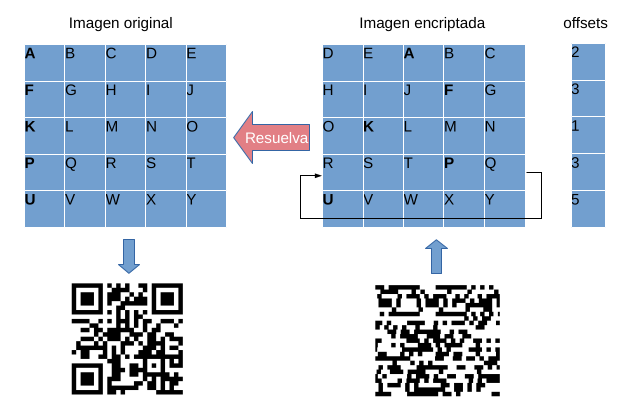

Te vamos a dar acceso a una **imagen encriptada cuadrada** en **formato PGM**, de **N = L × L píxeles**, que se puede visualizar fácilmente. La imagen se carga como un vector de host **`henc`**, tal que:

```
henc [n = i + jL] ≡ ImagenEncriptada(i, j)
```

Donde:  
- `i = 0, ..., L − 1` representa la **columna** (eje horizontal o "X"),  
- `j = 0, ..., L − 1` representa la **fila** (eje vertical o "Y") del píxel `n`.  

La imagen está encriptada de la siguiente forma (ver Figura):

```
ImagenEncriptada(i' , j' ) = ImagenOriginal(i, j)

i' = (i + offsets[j]) % L
j' = j
```

Donde `offsets[j]` es la suma de todos los valores de los píxeles en cada fila `j`, es decir:

```
offsets[j] = ∑ ImagenOriginal(i, j)
             i
```

## **Tu Misión**
Seguí las instrucciones y completá la plantilla **`desencriptador.cu`** para desencriptar la imagen utilizando **GPU** y escribir la imagen desencriptada **`hdes`** en **formato PGM**. Las funciones para leer y escribir imagenes hacia y desde vectores de host es provista.

Si lo hiciste correctamente, la imagen PGM de salida debería mostrar un **código QR legible**.  
Para compilar el código basta hacer:  
```sh
nvcc -arch=sm_75 desencriptador.cu -o desencriptador
```

y para correrlo

```sh
./desencriptador /content/imagen.pgm
```

donde imagen.pgm es la imagen que elegiste.
EL código arrojará el file

```sh
/content/imagen.pgm_desencripted.pgm
```

el cual es la versión desencriptada, la cual podés visualizarla con el script de python provisto (o bien usando un visualizador de imagenes propio).

Si la imagen de salida parece correcta, escaneá el código QR usando una **aplicación de lector de QR en su móvil** o cargá la imagen desencriptada en línea en  
[Lector QR](http://lector-codigos-qr.onlinegratis.tv/qr-reader/) (o cualquier otro lector de QR en línea que conozca) y visitar el enlace correspondiente.

### **Evaluación**
Para confirmar el éxito de su misión, entregar en el classroom un link a un notebook de google colab que contenga

1. **Código fuente de su solución listo para compilar y ejecutar**
2. **Una descripción y comentarios sobre lo que encuentre en la página correspondiente al QR desencriptado**



# Instrucciones

## (1) Seleccionar, copiar y visualizar un QR encriptado



In [1]:
#@ Bajar las imagenes encriptadas
!pip install --upgrade gdown
!gdown --folder --id 1uFRT1HMMFvmD9okUj8SD5FaJzoGtn-n7 -O /content/desencriptame

#https://drive.google.com/drive/folders/1uFRT1HMMFvmD9okUj8SD5FaJzoGtn-n7?usp=drive_link

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1oNJTzSk_QuIrqZq2_Eh_7KaSxEy5ur2w qr1.pgm_encripted.pgm
Processing file 1PPaKB24yG-4XLekrU8DHOP1cibUN9t9J qr2.pgm_encripted.pgm
Processing file 179Pv3NOtwlK_kNosOv5X67BCHblf5h2V qr3.pgm_encripted.pgm
Processing file 17UQ8tJvVWYsMgzpIbLu2f5ZWFJT-r1Ga qr4.pgm_encripted.pgm
Processing file 13epa0rmfcrAKaG7AOkfYh2ZMwwgYrNGy qr5.pgm_encripted.pgm
Processing file 1SgQH5ALYBBEPIpv_kfJnDMPygLFp5Lrn qr6.pgm_encripted.pgm
Processing file 1fzqP8QMXfJGok-i5B04-dM-3dtyJlABh qr7.pgm_encripted.pgm
Processing file 1y3eRBYr-OKFI1zxheG5J2beQ3c52hmVi qr8.pgm_encripted.pgm
Processing file 1ecuK3ouVTAd6b3RKIkUSjRpoRDrWRowP qr9.pgm_encripted.pgm
Processing file 1LCaDn4rFhOtgBFwU99rEg5Mic7uk6oFh qr10.pgm_encripted.pgm
Processing file 11pbFpLASPkg9AC

Corré el siguiente script para seleccionar una.

In [2]:
#@title Seleccionar Imagen Encriptada

def process_qr_code():
    """Asks for a number N, copies a file, and prints instructions."""

    while True:
        try:
            n = int(input("Enter a number N between 1 and 13: "))
            if 1 <= n <= 13:
                break
            else:
                print("Invalid input. Please enter a number between 1 and 13.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    # Construct the file path dynamically
    source_file = f"/content/desencriptame/qr{n}.pgm_encripted.pgm"
    destination_file = "x.pgm"

    # Execute the copy command
    !cp "{source_file}" "{destination_file}"

    # Print the instructions (can be modified as needed)
    print(f"File qr{n}.pgm_encripted.pgm copied to x.pgm")


if __name__ == "__main__":
    process_qr_code()


Enter a number N between 1 and 13: 5
File qr5.pgm_encripted.pgm copied to x.pgm


Corré el siguiente script para visualizar la imagen encriptada seleccionada

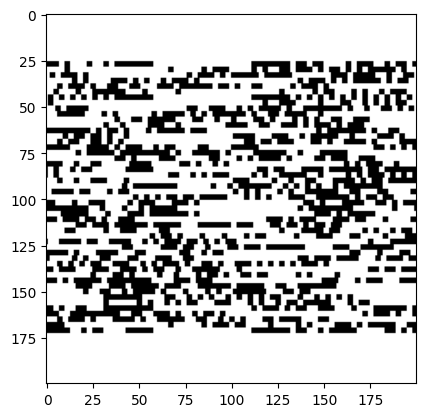

In [3]:
#@title Visualizar la imagen x.pgm en python
# prompt: visualize x.pgm

from PIL import Image
import matplotlib.pyplot as plt

def visualizador(file):
  # Load the PGM image
  img = Image.open(file)

  # Display the image using matplotlib
  plt.imshow(img, cmap='gray')
  plt.show()

visualizador('/content/x.pgm')

## (2) Completar el template

Incluí el siguiente header

In [4]:
#@title Header necesario para leer/escribir imagenes pgm, a partir de host_vectors

%%writefile desencript.h

// lee de pgm y lo guarda en un host_vector
void leepgm(std::ifstream &finp, thrust::host_vector<int> &hz)
{
	// avanzamos sobre el encabezado de pgm
	std::string nombre;
	std::string doscincocinco("255");
	do{
		std::getline(finp,nombre);
	}while(nombre.compare(doscincocinco)!=0);

	int value;
	for(int i=0;i<L*L;i++)
	{
		finp >> value;
		hz[i]=value;
	}
}

// lee un host vector y lo guarda en un pgm
void escribepgm(std::ofstream &fout, thrust::host_vector<int> &hz)
{
	fout << "P2\n" << L << " " << L << "\n255\n";
	for(int j=0;j<L*L;j++)
	{
		fout << hz[j] << std::endl;
	}
}


Writing desencript.h


Y ahora sí, en el template siguiente tenés que completar las partes de código indicadas con **TODO** (si no completas nada funciona, pero no le hace nada a la imagen encriptada)

In [5]:
#@title Template a completar
%%writefile desencriptador.cu

#include<fstream>
#include<iostream>
#include<ctime>
#include<thrust/host_vector.h>
#include<thrust/device_vector.h>
#include<thrust/reduce.h>
#include<thrust/transform.h>

// vamos a fijar el tamaño de las imágenes a 200x200 píxeles
#define L 200

// declaración/definición de funciones de lectura/escritura
#include "desencript.h"

// TODO: escriba su/sus functors o su/sus kernels aqui abajo...
__global__ void desencriptar_kernel(int *enc, int *des, int *offsets) {
    int j = blockIdx.x;  // Índice de fila
    int i = threadIdx.x; // Índice de columna

    int index = j * L + i; // Índice lineal en la imagen encriptada

    // Calculamos la columna original del píxel
    int i_original = (i - offsets[j] + L) % L;
    int new_index = j * L + i_original;

    // Copiamos el valor al índice correcto
    des[new_index] = enc[index];
}

// TODO: complete la siguiente función de desencriptación
void desencriptar(char *name)
{
    // Número total de píxeles
    int N = L * L;

    // Declaramos vectores para la imagen encriptada y la desencriptada en el host de N=L*L píxeles
    thrust::host_vector<int> h_enc(N); // Imagen encriptada en host
    thrust::host_vector<int> h_des(N); // Imagen desencriptada en host

    // Lee la imagen encriptada en h_enc
    std::ifstream fin(name);    // Archivo de entrada
    leepgm(fin, h_enc);         // Lectura de imagen encriptada

    // Declaramos y alocamos vectores de device (de C o thrust) para la imagen encriptada y para la desencriptada
    // y hacemos la copia de la imagen encriptada de host a device
    thrust::device_vector<int> enc(h_enc);
    thrust::device_vector<int> des(N, 0);
    int *enc_raw = thrust::raw_pointer_cast(enc.data());
    int *des_raw = thrust::raw_pointer_cast(des.data());

    // TODO: declare y aloque vectores de device (thrust o C) para los offsets
    thrust::device_vector<int> offsets(L, 0);
    int *offsets_raw = thrust::raw_pointer_cast(offsets.data());

    // TODO: encuentre los offsets de cada fila en device
    for (int j = 0; j < L; ++j) {
        offsets[j] = thrust::reduce(enc.begin() + j * L, enc.begin() + (j + 1) * L);
    }

    // TODO: lance un kernel o algoritmo de thrust para desencriptar la imagen dados los offsets
    desencriptar_kernel<<<L, L>>>(enc_raw, des_raw, offsets_raw);
    cudaDeviceSynchronize(); // Esperamos a que termine la ejecución en GPU

    // Copiamos la imagen desencriptada de device a host en h_des
    thrust::copy(des.begin(), des.end(), h_des.begin());

    // Escribe la imagen desencriptada h_des en un file pgm
    // Si no desencripto imprimirá la imagen original
    char nom[50];
    sprintf(nom, "%s_desencripted.pgm", name);
    std::ofstream fout2(nom);

    escribepgm(fout2, h_des);
}

int main(int argc, char **argv)
{
    std::cout << "desencriptando " << argv[1] << std::endl;
    desencriptar(argv[1]);

    return 0;
}



Writing desencriptador.cu


## (3) Compilación y Corrida

Luego de completar el template, compilá y corré de la siguiente manera

In [6]:
!nvcc -arch=sm_75 desencriptador.cu -o desencriptador

In [7]:
!./desencriptador /content/x.pgm

desencriptando /content/x.pgm


Si el programa corre correctamente, un file x.pgm_desencripted.pgm debe existir como resultado.

## (4) Visualización del resultado

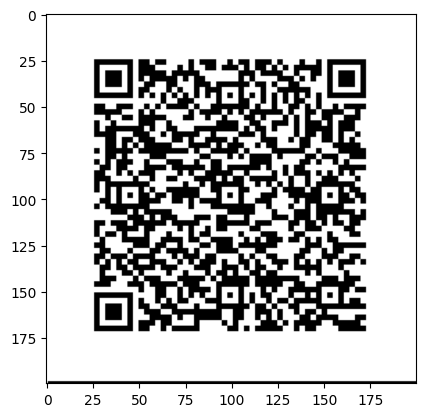

In [8]:
visualizador("/content/x.pgm_desencripted.pgm")

## (5) Descripción del resultado

Si el código fue completado exitosamente, la imagen de arriba debería ser un QR valido, al cual podés acceder y describir/comentar, en esta sección...




---


---



# Version python (en construcción)

In [ ]:
%%writefile desencriptador.py
import cupy as cp
import numpy as np

def leepgm(filename):
    """Reads a PGM image and returns a CuPy array."""
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Skip header lines until we reach "255"
    while lines[0].strip() != "255":
        lines.pop(0)
    lines.pop(0)  # Remove "255"

    # Read pixel values
    pixels = np.array([int(val) for val in lines], dtype=np.int32)
    return cp.array(pixels.reshape((200, 200)))

def escribepgm(filename, img):
    """Writes a CuPy array as a PGM image."""
    img = cp.asnumpy(img)  # Convert back to NumPy
    with open(filename, 'w') as f:
        f.write(f"P2\n200 200\n255\n")
        for row in img:
            f.write(" ".join(map(str, row)) + "\n")

def desencriptar(filename):
    """Decrypts an encrypted PGM image."""
    print(f"Desencriptando {filename}")

    # Cargamos imagen encriptada
    h_enc = leepgm(filename)  # CuPy array (200x200)
    h_des = cp.zeros_like(h_enc)  # Placeholder for decrypted image

    # Alocamos memoria en GPU para ambas imagenes
    d_enc = cp.array(h_enc, dtype=cp.int32)
    d_des = cp.array(h_enc, dtype=cp.int32)  # Copy structure

    # TODO: Implementar la desencriptacion aqui...
    # Por ahora copiamos la original....
    d_des[:] = d_enc  # Reemplazar por su codigo de desencriptación
    #
    # HAGAN MAGIA AQUI
    #

    # Copy back to host
    h_des = d_des.get()

    # Escribimos la desencriptada
    output_filename = f"{filename}_desencripted.pgm"
    escribepgm(output_filename, h_des)
    print(f"Image saved as {output_filename}")

if __name__ == "__main__":
    import sys
    if len(sys.argv) < 2:
        print("Usage: python desencriptador.py <image.pgm>")
    else:
        desencriptar(sys.argv[1])


Writing desencriptador.py


In [ ]:
!python desencriptador.py /content/x.pgm

Desencriptando /content/x.pgm
Image saved as /content/x.pgm_desencripted.pgm


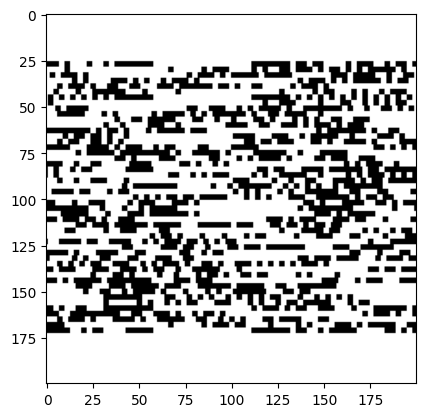

In [ ]:
visualizador("/content/x.pgm_desencripted.pgm")